**Заголовок:** Исследование продаж компьютерных игр для определения успешных продуктов и планирования рекламных кампаний.

**Описание проекта:** В данном проекте мы проведем анализ исторических данных о продажах компьютерных игр с целью выявления закономерностей, определяющих успешность игры. Используя данные о платформах, жанрах, оценках пользователей и критиков, мы сможем сделать обоснованные предположения о потенциально популярных продуктах и спланировать рекламные кампании на 2017 год. Работа включает в себя подготовку данных, исследовательский анализ, составление портрета пользователей для разных регионов и проверку гипотез.

**Цель исследования:** Целью исследования является выявление закономерностей, определяющих успешность компьютерных игр, что позволит интернет-магазину «Стримчик» более эффективно планировать свои рекламные кампании и ориентироваться на предпочтения пользователей.

**Ход исследования:**
1. Открытие файла с данными и изучение информации.
2. Подготовка данных: преобразование типов данных, приведение названий столбцов к нижнему регистру, обработка пропусков, обработка дубликатов, создание нового столбца total_sales, который суммирует продажи во всех регионах.
3. Исследовательский анализ данных: анализ количества игр, выпущенных по годам, для определения актуального периода, изучение изменений в продажах по платформам, анализ влияния отзывов пользователей и критиков на продажи через диаграмму рассеяния и расчет корреляции, исследование общего распределения игр по жанрам для выявления самых прибыльных жанров.
4. Портрет пользователя каждого региона: Определение топ-5 популярных платформ и жанров для каждого региона (NA, EU, JP).Анализ различий в долях продаж между регионами. Исследование влияния рейтинга ESRB на продажи в каждом регионе.
5. Проверка гипотез: Проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Проверка гипотезы о различии средних пользовательских рейтингов жанров Action и Sports.

**Общий вывод:** Резюмирование полученных результатов, формулировка конечных выводов и рекомендаций.

**Шаг №1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Вывод:* данные были успешно загружены, изучена общая информация

**Шаг №2**

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
data['rating'] = data['rating'].fillna('неизвестен')
data.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [9]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [10]:
max_year = data[data['user_score'] == 'tbd']['year_of_release'].max()
max_year

2016.0

In [11]:
data['user_score'] = np.where(data['user_score'] == 'tbd', np.nan, data['user_score'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

*Вывод:* 

1. были изучены пропуски в столбцах name и genre, они появились в одинаковых строчках, и информацию об этой игре невозможно установить.
2. были изучены пропуски в столбцах с оценками, эти пропуски невозможно заполнить, т.к. оценки критиков/пользователей крайне важны и относятся к определенной игре, так что их нельзя заполнить медианой/средним.
3. рейтинг ERSB был заполнен "неизвестен".
4. были изучены пропуски в столбце с годом релиза, по названию игр можно понять, что год их релиза примерно 2004-2006, эти данные уже неактуальны для нашего исследования.
5. оценка пользователя tbd указывает на то, что оценка еще не определена/ не доступна, мы заменим ее на nan, так как замена на численное значение может дать искажение, а удаление данных - сокращение информации об играх

После удаления/заполнения пропусков поменяем тип данных в некоторых столбцах
1. year_of_release - тип данных int32, использовать float64 неуместно, я не выбрала тип datetime, т.к. мы ничего не знаем о дне и месяце выхода игры
2. user_score меняем на float

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int32')

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [14]:
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


*Вывод:*

Были изучены пропуски, и вот возможные причины их образования:
1. системный сбой.
2. человеческий фактор (забыли указать год релиза и т.п.)
3. оценка игры еще не опредлена/не доступна (игра только вышла).
4. оценка находится на изменении и еще не отображается.

Были заполнены пропуски, где это возможно

Был изменен тип данных в столбцах year_of_release, user_score

Были удалены строки, содержащие неактуальную/неполную информацию.

Был добавлен столбец с суммарным количеством продаж каждой игры.

In [15]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [16]:
data = data.drop(index=16230)

In [17]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [18]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [19]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

*Вывод:* 

Была добавлена проверка на явные дубликаты: в датасете присутствовала дублирующая строчка, которая была удалена.

Была добавлена проверка на неявные дубликаты: проверены столбцы genre, platform - дубликатов не обнаружено. 

**Шаг №3**

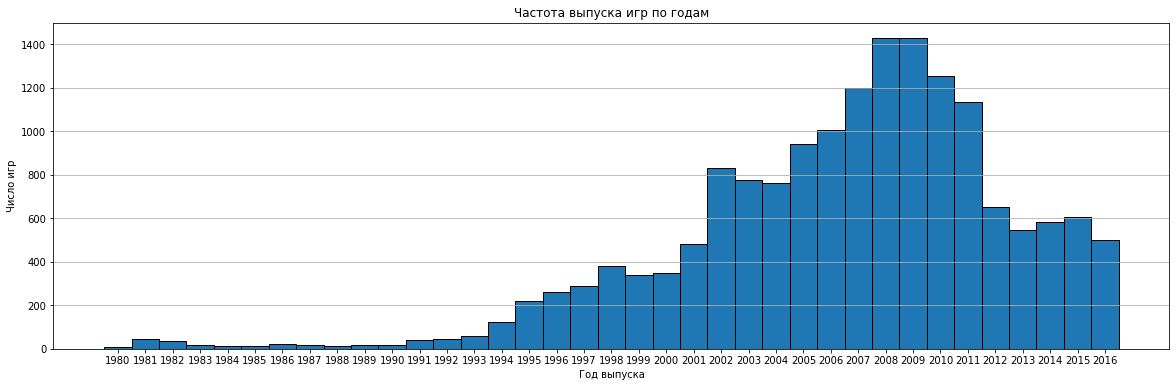

In [20]:
min_year = int(data['year_of_release'].min())
max_year = int(data['year_of_release'].max())

bins = [year - 0.5 for year in range(min_year, max_year + 2)]

plt.figure(figsize=(20, 6))
plt.hist(data['year_of_release'], bins=bins, edgecolor='black', align='mid')
plt.title('Частота выпуска игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Число игр')
plt.xticks(range(min_year, max_year + 1))
plt.grid(axis='y')

plt.show()

*Вывод:* нам не важны данные за все года, т.к. они уже неактуальны

In [21]:
table = data.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False)
table.head(10)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


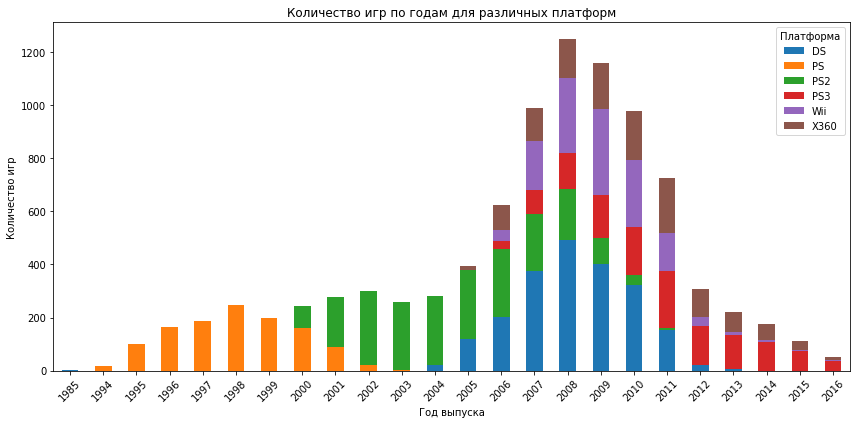

In [22]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
filtered_data = data[data['platform'].isin(platforms)]

grouped_data = filtered_data.groupby(['year_of_release', 'platform']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', figsize=(12, 6), stacked=True)

plt.title('Количество игр по годам для различных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.legend(title='Платформа')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

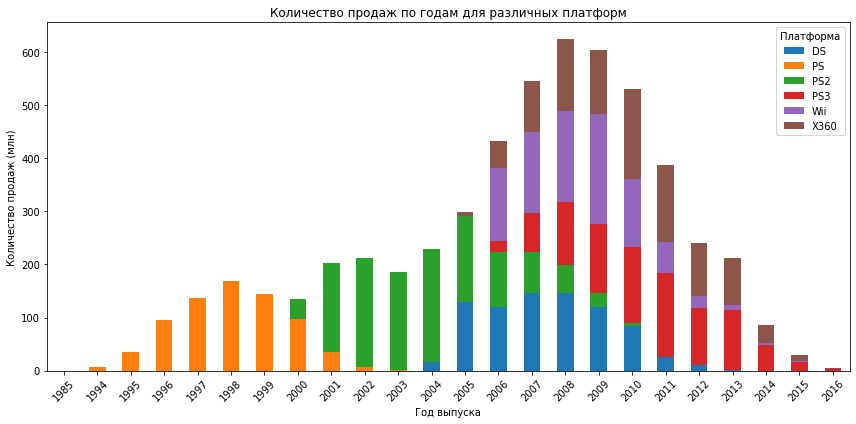

In [23]:
filtered_data1 = data[data['platform'].isin(platforms)]

grouped_data1 = filtered_data1.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

grouped_data1.plot(kind='bar', figsize=(12, 6), stacked=True)

plt.title('Количество продаж по годам для различных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж (млн)')
plt.legend(title='Платформа')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

*Вывод:* в среднем определенная платформа выпускает игры в течении ~10-11 лет. 

Пик продаж и количества выпущенных игр наступал через ~3 года после выпуска первой игры.


Выбор актуальных данных: актуальным периодом для работы с данными будет 2015 и 2016 годы.

Данные за 2015 год помогут выявить долгосрочные тренды и сезонные колебания, которые могут повлиять на продажи в 2017 году

 Данные за 2016 год позволят увидеть, как изменились продажи по сравнению с предыдущим годом. Это поможет понять, какие факторы повлияли на рост или падение, и адаптировать стратегию на 2017 год.

In [24]:
data_cleaned = data.query('year_of_release >= 2015')

In [25]:
data_cleaned.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False)

,platform,total_sales
3,PS4,188.15
9,XOne,86.29
0,3DS,42.92
7,WiiU,20.95
2,PS3,20.42
1,PC,13.77
8,X360,13.48
5,PSV,10.50
6,Wii,1.32
4,PSP,0.12


Лидирующими за 2015, 2016 года являются платформы: PS4, XOne, 3DS, WiiU, PS3

In [26]:
data_platform = data_cleaned.query('platform in ["PS4", "XOne", "3DS", "WiiU", "PS3"]')
result1 = data_platform.groupby(['platform', 'year_of_release'], as_index=False)['total_sales'].sum()
result1

,platform,year_of_release,total_sales
0,3DS,2015,27.78
1,3DS,2016,15.14
2,PS3,2015,16.82
3,PS3,2016,3.60
4,PS4,2015,118.90
5,PS4,2016,69.25
6,WiiU,2015,16.35
7,WiiU,2016,4.60
8,XOne,2015,60.14
9,XOne,2016,26.15


*Вывод*: наблюдается спад продаж для всех платформ в 2016 году, по сравнению с 2015

Выберем поценциально прибыльные платформы: PS4, 3DS, XOne 

Выбор был сделан на основе отношения количества продаж в 2016 к 2015г.

Медиана глобальных продаж по платформам:
platform
3DS     0.090
PS3     0.060
PS4     0.120
WiiU    0.215
XOne    0.130
Name: total_sales, dtype: float64


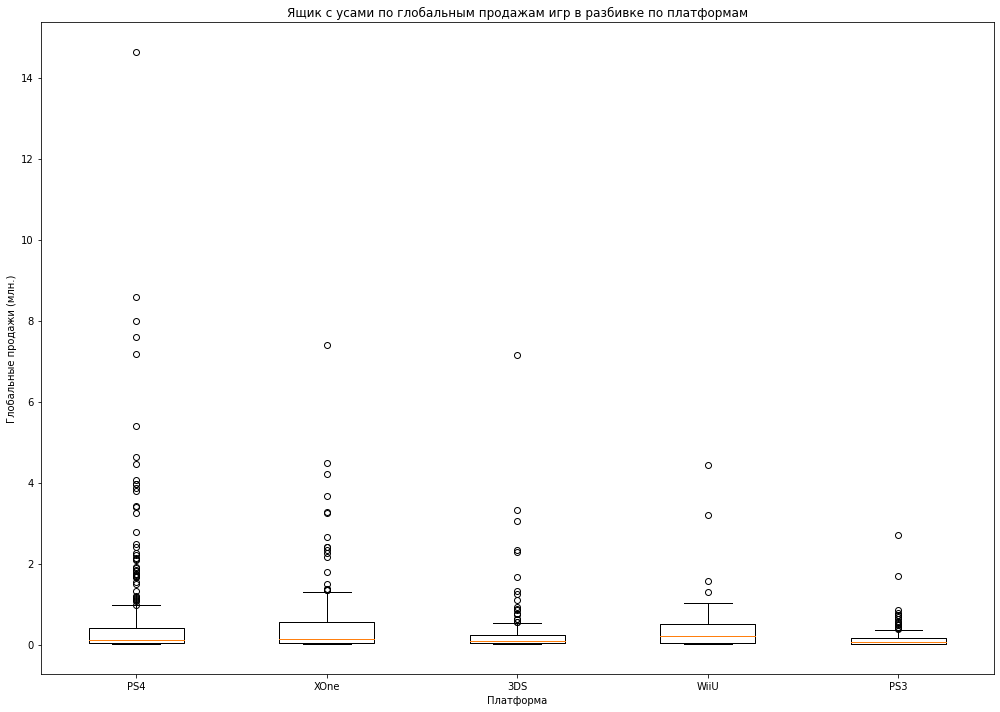

In [27]:


median_sales = data_platform.groupby('platform')['total_sales'].median()

print("Медиана глобальных продаж по платформам:")
print(median_sales)

plt.figure(figsize=(14, 10))

plt.boxplot([data_platform[data_platform['platform'] == platform]['total_sales'] for platform in data_platform['platform'].unique()],
            labels=data_platform['platform'].unique())

plt.title('Ящик с усами по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн.)')
plt.tight_layout()

plt.show()

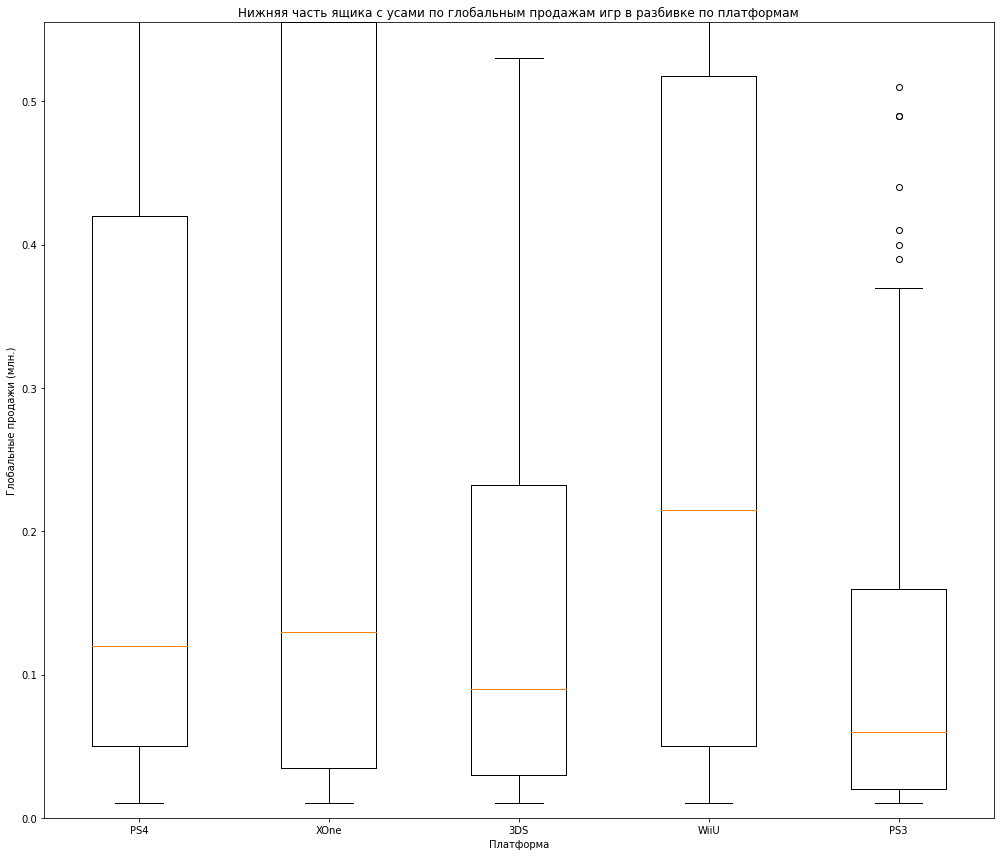

In [28]:
q75_sales = data_platform.groupby('platform')['total_sales'].quantile(0.75)


plt.figure(figsize=(14, 12))


plt.boxplot([data_platform[data_platform['platform'] == platform]['total_sales'] for platform in data_platform['platform'].unique()],
            labels=data_platform['platform'].unique())


plt.ylim(0, q75_sales.max())

plt.title('Нижняя часть ящика с усами по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн.)')
plt.tight_layout()
plt.show()

*Вывод:* на графиках видно наличие выбросов, так что будем оперировать медианой, которая являеется более устойчивой.

Самое большое медианное значение у платформы WiiU, а самый большой межквартильный размах у платформы XOne

Медианные значения для платформ PS4 и XOne почти равны, однако для 3DS оно ниже.

Межквартильный размах больше у XOne, а у PS4 наблюдается большое количество выбросов, т.е. игры с экстремально большим количеством продаж.

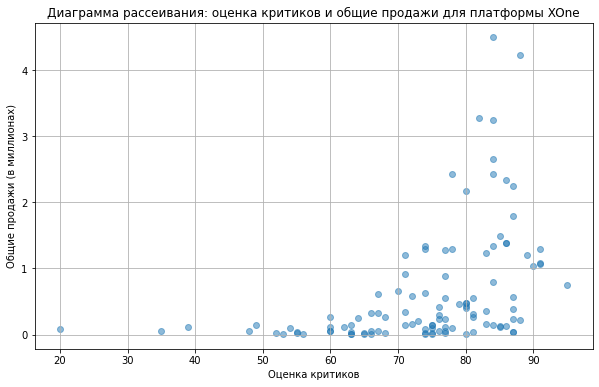

In [29]:
data_actual_platform = data_platform.query('platform in ["PS4", "XOne", "3DS"]')
data_filtered_actual_platform = data_actual_platform.dropna(subset=['critic_score', 'user_score'])

data_xone = data_filtered_actual_platform[data_filtered_actual_platform['platform'] == 'XOne']

plt.figure(figsize=(10, 6))
plt.scatter(data_xone['critic_score'], data_xone['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка критиков и общие продажи для платформы XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

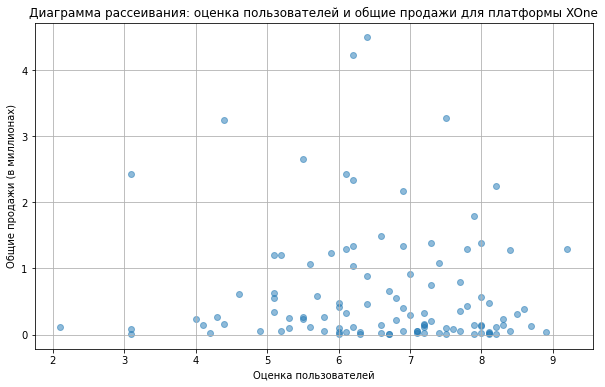

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(data_xone['user_score'], data_xone['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка пользователей и общие продажи для платформы XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

In [31]:
data_xone['critic_score'].corr(data_xone['total_sales'])

0.4225192624742895

In [32]:
data_xone['user_score'].corr(data_xone['total_sales'])

-0.06868389218473443

*Вывод:* по диаграмме рассивания и подсчитанным коэф-ам корреляции понятно, что:
1. между отзывами критиков и продажами игр несильная положительная статистическая связь.
2. между отзывами пользователей и продажами игр нет статистической связи, коэф-т корреляции близок к 0.

In [33]:
data_ps4 = data_filtered_actual_platform[data_filtered_actual_platform['platform'] == 'PS4']
data_ps4['critic_score'].corr(data_ps4['total_sales']), data_ps4['user_score'].corr(data_ps4['total_sales'])

(0.3920741369660568, -0.06436843081030288)

Для точности выводов рассмотрим еще одну платформу.

Выводы, сделанные ранее, подтвердились.

Мнение критиков сильнее влияет на продажи, чем мнение пользователей, но сильная статистическая связь отсуствует.

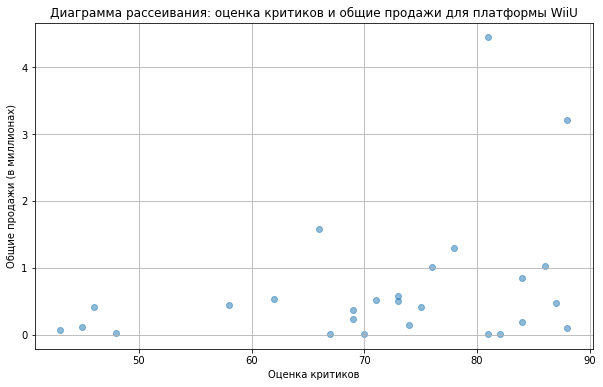

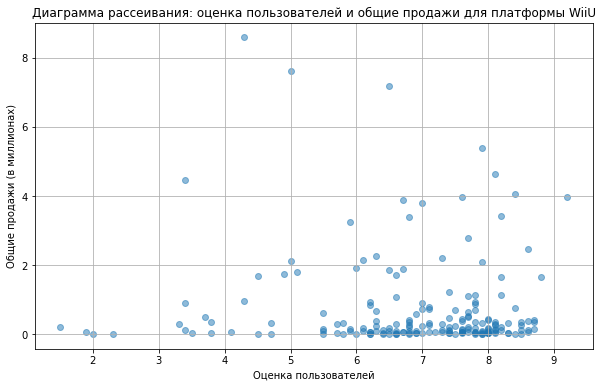

In [34]:
data_cleaned_platform = data_platform.dropna(subset=['critic_score', 'user_score'])

data_wiiu = data_cleaned_platform[data_cleaned_platform['platform'] == 'WiiU']

plt.figure(figsize=(10, 6))
plt.scatter(data_wiiu['critic_score'], data_wiiu['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка критиков и общие продажи для платформы WiiU')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data_ps4['user_score'], data_ps4['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка пользователей и общие продажи для платформы WiiU')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

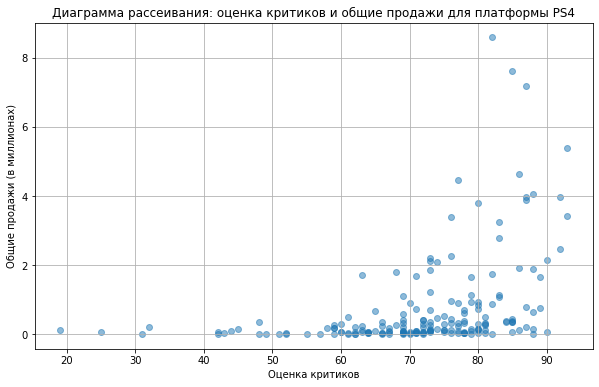

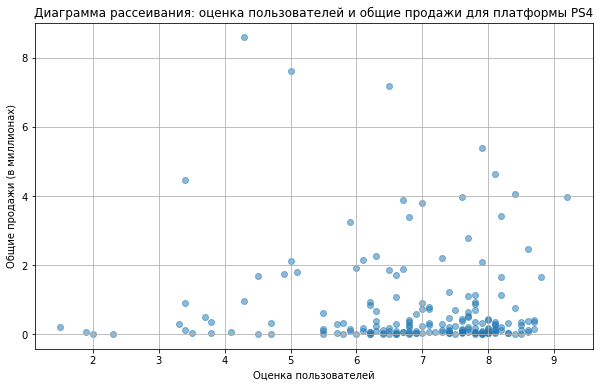

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(data_ps4['critic_score'], data_ps4['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка критиков и общие продажи для платформы PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data_ps4['user_score'], data_ps4['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка пользователей и общие продажи для платформы PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

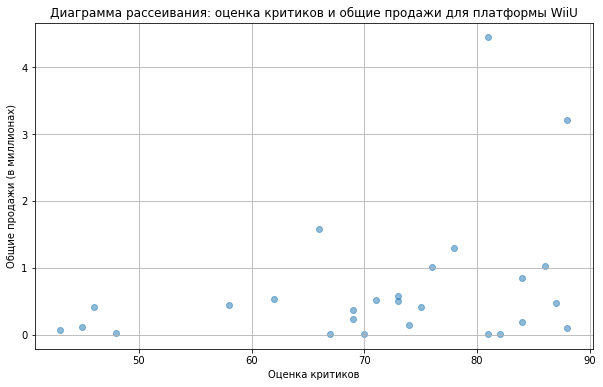

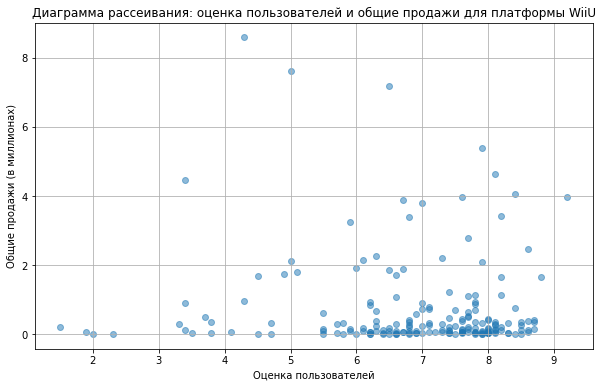

In [36]:
data_cleaned_platform = data_platform.dropna(subset=['critic_score', 'user_score'])

data_wiiu = data_cleaned_platform[data_cleaned_platform['platform'] == 'WiiU']

plt.figure(figsize=(10, 6))
plt.scatter(data_wiiu['critic_score'], data_wiiu['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка критиков и общие продажи для платформы WiiU')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data_ps4['user_score'], data_ps4['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка пользователей и общие продажи для платформы WiiU')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

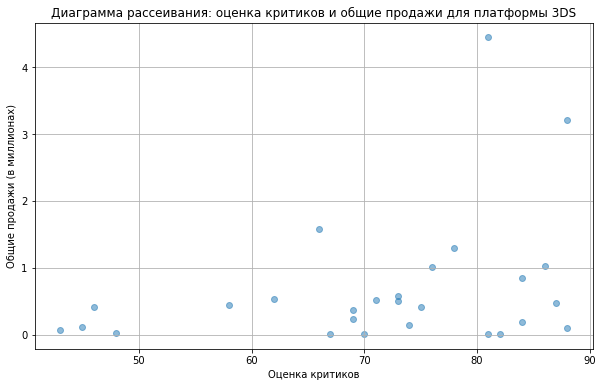

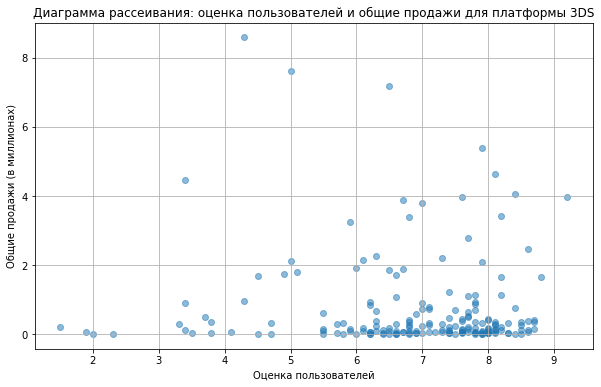

In [37]:

data_3DS = data_cleaned_platform[data_cleaned_platform['platform'] == '3DS']

plt.figure(figsize=(10, 6))
plt.scatter(data_wiiu['critic_score'], data_wiiu['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка критиков и общие продажи для платформы 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data_ps4['user_score'], data_ps4['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка пользователей и общие продажи для платформы 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

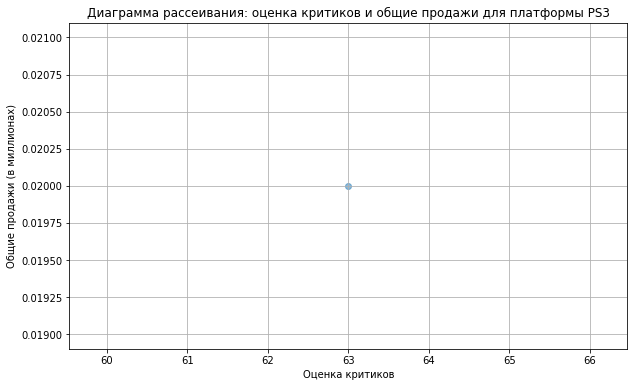

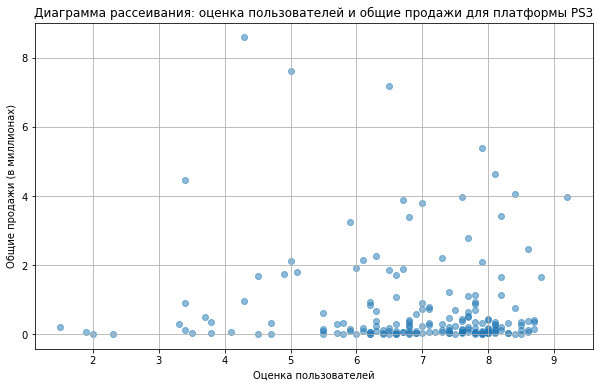

In [38]:
data_cleaned_platform = data_platform.dropna(subset=['critic_score', 'user_score'])

data_wiiu = data_cleaned_platform[data_cleaned_platform['platform'] == 'PS3']

plt.figure(figsize=(10, 6))
plt.scatter(data_wiiu['critic_score'], data_wiiu['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка критиков и общие продажи для платформы PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data_ps4['user_score'], data_ps4['total_sales'], alpha=0.5)
plt.title('Диаграмма рассеивания: оценка пользователей и общие продажи для платформы PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи (в миллионах)')
plt.grid(True)
plt.show()

*Вывод:* ни на одной из диаграмм рессеиния не наблюдается сильной линейной связи, выводы, сделанные раннее, подтверждены, но теперь для них есть полные основания.

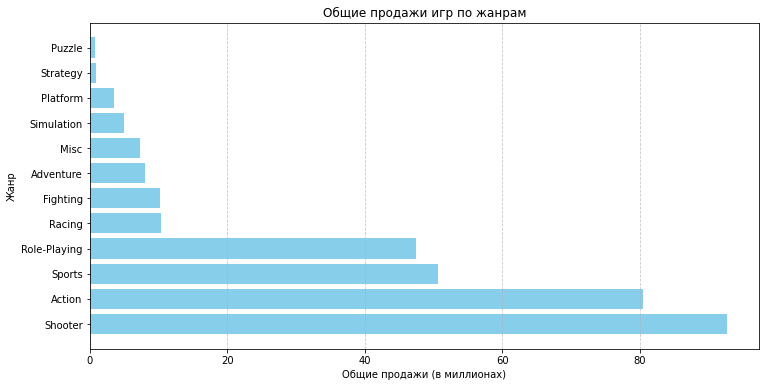

           genre  total_sales
8        Shooter        92.77
0         Action        80.42
10        Sports        50.60
7   Role-Playing        47.45
6         Racing        10.37
2       Fighting        10.17
1      Adventure         8.07
3           Misc         7.33
9     Simulation         5.02
4       Platform         3.54
11      Strategy         0.92
5         Puzzle         0.70


In [39]:
genre_sales = data_actual_platform.groupby('genre')['total_sales'].sum().reset_index()


genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(genre_sales['genre'], genre_sales['total_sales'], color='skyblue')
plt.title('Общие продажи игр по жанрам')
plt.xlabel('Общие продажи (в миллионах)')
plt.ylabel('Жанр')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print(genre_sales)

           genre      mean  median
8        Shooter  1.627544   0.630
10        Sports  0.903571   0.220
7   Role-Playing  0.624342   0.200
2       Fighting  0.423750   0.165
9     Simulation  0.334667   0.120
4       Platform  0.221250   0.120
6         Racing  0.357586   0.100
0         Action  0.346638   0.090
11      Strategy  0.092000   0.070
5         Puzzle  0.140000   0.060
3           Misc  0.192895   0.055
1      Adventure  0.192143   0.055


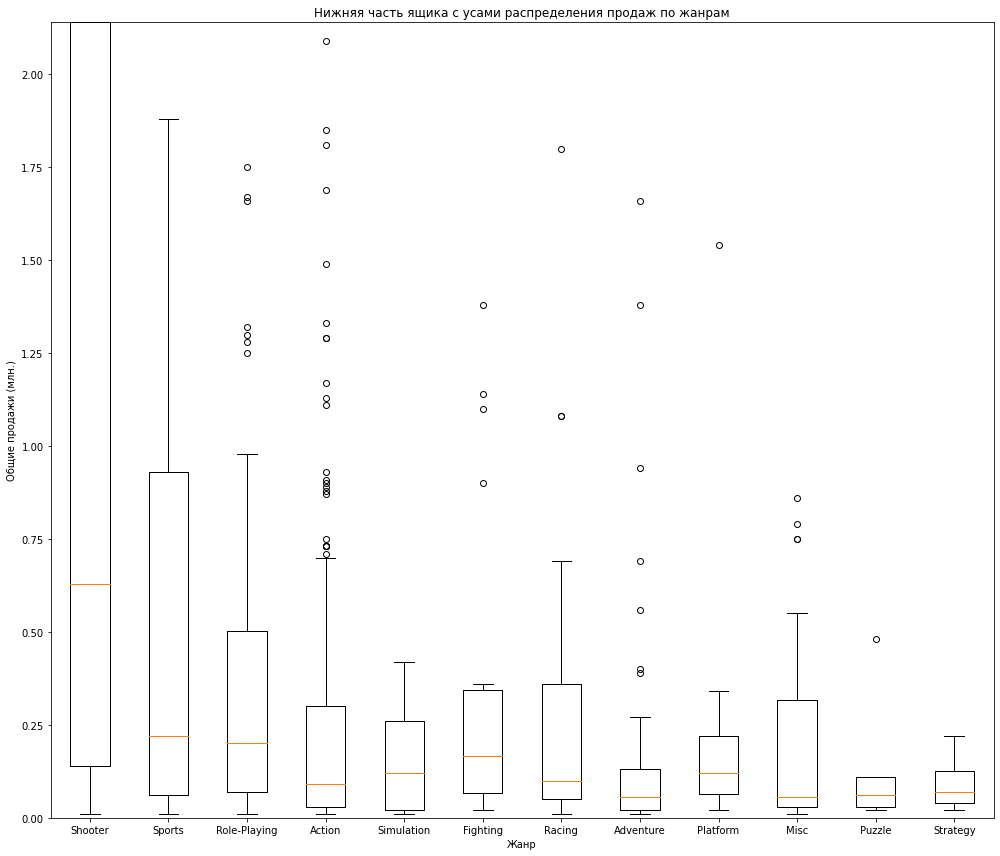

In [40]:
genre_sales = data_actual_platform.groupby('genre')['total_sales'].agg(['mean', 'median']).reset_index()

print(genre_sales.sort_values(by='median', ascending = False))



q75_sales1 = data_actual_platform.groupby('genre')['total_sales'].quantile(0.75)

plt.figure(figsize=(14, 12))


plt.boxplot([data_actual_platform[data_actual_platform['genre'] == genre]['total_sales'] for genre in data_actual_platform['genre'].unique()],
            labels=data_actual_platform['genre'].unique())


plt.ylim(0, q75_sales1.max())

plt.title('Нижняя часть ящика с усами распределения продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи (млн.)')
plt.tight_layout()
plt.show()

*Вывод:* можно сделать вывод о том, что самым прибльным жанром являентся shooter.

Будем оперировать медианой, так как на графике видно наличие выбросов.

Жанры с самым большим медианным количеством продаж:
1. Shooter.
2. Sports.

Жанры с самым низким медианным количеством продаж:
1. Misc.
2. Adventure.

**Шаг №4**

In [41]:
data_cleaned.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False)

,platform,total_sales
3,PS4,188.15
9,XOne,86.29
0,3DS,42.92
7,WiiU,20.95
2,PS3,20.42
1,PC,13.77
8,X360,13.48
5,PSV,10.50
6,Wii,1.32
4,PSP,0.12


In [42]:
data_cleaned.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,неизвестен,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,неизвестен,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,неизвестен,7.39


In [43]:
platform_sales = data_cleaned.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
top_na_platforms = platform_sales.nlargest(5, 'na_sales')
top_eu_platforms = platform_sales.nlargest(5, 'eu_sales')
top_jp_platforms = platform_sales.nlargest(5, 'jp_sales')
print('Топ платформ NA:')
display(top_na_platforms)
print()
print('Топ платформ EU:')
display(top_eu_platforms)
print()
print('Топ платформ JP:')
display(top_jp_platforms)
print()

total_na_sales = platform_sales['na_sales'].sum()
total_eu_sales = platform_sales['eu_sales'].sum()
total_jp_sales = platform_sales['jp_sales'].sum()

# вычисляем доли
platform_sales['na_share'] = platform_sales['na_sales'] / total_na_sales
platform_sales['eu_share'] = platform_sales['eu_sales'] / total_eu_sales
platform_sales['jp_share'] = platform_sales['jp_sales'] / total_jp_sales

top_na_shares = platform_sales[platform_sales['platform'].isin(top_na_platforms['platform'])][['platform', 'na_share']]
top_eu_shares = platform_sales[platform_sales['platform'].isin(top_eu_platforms['platform'])][['platform', 'eu_share']]
top_jp_shares = platform_sales[platform_sales['platform'].isin(top_jp_platforms['platform'])][['platform', 'jp_share']]

top_platforms = pd.merge(top_na_shares, top_eu_shares, on='platform', how='outer')
top_platforms = pd.merge(top_platforms, top_jp_shares, on='platform', how='outer')

print('Рассчитанные доли продаж по регионам:')
display(top_platforms)

Топ платформ NA:


,platform,na_sales,eu_sales,jp_sales
3,PS4,63.86,83.54,12.05
9,XOne,50.30,28.10,0.18
0,3DS,10.31,7.39,23.55
7,WiiU,8.86,6.49,4.12
8,X360,8.05,4.21,0.00



Топ платформ EU:


,platform,na_sales,eu_sales,jp_sales
3,PS4,63.86,83.54,12.05
9,XOne,50.30,28.10,0.18
1,PC,3.72,9.10,0.00
0,3DS,10.31,7.39,23.55
2,PS3,5.66,7.30,4.97



Топ платформ JP:


,platform,na_sales,eu_sales,jp_sales
0,3DS,10.31,7.39,23.55
3,PS4,63.86,83.54,12.05
5,PSV,0.54,1.08,8.41
2,PS3,5.66,7.30,4.97
7,WiiU,8.86,6.49,4.12



Рассчитанные доли продаж по регионам:


,platform,na_share,eu_share,jp_share
0,3DS,0.067923,0.049953,0.441011
1,PS4,0.420713,0.564688,0.225655
2,WiiU,0.058370,NaN,0.077154
3,X360,0.053034,NaN,NaN
4,XOne,0.331379,0.189942,NaN
5,PC,NaN,0.061511,NaN
6,PS3,NaN,0.049344,0.093071
7,PSV,NaN,NaN,0.157491


*Вывод:*

Самые популярные платформы:

Для региона NA:
1. PS4
2. XOne
3. 3DS
4. WiiU
5. X360

Для региона EU:
1. PS4
2. XOne
3. PC
4. 3DS
5. PS3

Для региона JP:
1. 3DS
2. PS4
3. PSV
4. PS3
5. WiiU


Большая доля покупок игр на платформе 3DS принадлежит пользователям из региона JP

Большая доля покупок игр на платформе PS4 принадлежит пользователям из региона EU

Большая доля покупок игр на платформе XOne принадлежит пользователям из региона NA

In [44]:
na_genre_sales = data_cleaned.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genre_sales = data_cleaned.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genre_sales = data_cleaned.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Топ-5 жанров в NA:\n", na_genre_sales)
print("\nТоп-5 жанров в EU:\n", eu_genre_sales)
print("\nТоп-5 жанров в JP:\n", jp_genre_sales)

Топ-5 жанров в NA:
 genre
Shooter         48.18
Action          33.68
Sports          26.31
Role-Playing    19.82
Misc             5.58
Name: na_sales, dtype: float64

Топ-5 жанров в EU:
 genre
Shooter         40.28
Action          34.82
Sports          27.82
Role-Playing    17.21
Racing           6.52
Name: eu_sales, dtype: float64

Топ-5 жанров в JP:
 genre
Action          23.05
Role-Playing    13.41
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64


*Вывод:*

Самые популярные жанры:

Для региона NA:
1. Shooter
2. Action
3. Sports
4. Role-playing
5. Misc

Для региона EU:
1. Shooter
2. Action
3. Sports
4. Role-playing
5. Racing

Для региона JP:
1. Acion
2. Role-playing
3. Shooter
4. Misc
5. Adventure

Для регионов NA и EU топ жанров почти идентичный.

Для региона JP: есть такие же жанры, однако они занимают другие позиции в рейтинге.


In [45]:
unknown_rating_count = data_cleaned[data_cleaned['rating'] == 'неизвестен'].shape[0]
print(f"Количество записей с рейтингом 'неизвестен': {unknown_rating_count}")


sales_by_rating = data_cleaned.groupby('rating').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'total_sales': 'sum'
}).reset_index()


display(sales_by_rating)

Количество записей с рейтингом 'неизвестен': 513


,rating,na_sales,eu_sales,jp_sales,total_sales
0,E,26.59,34.83,5.25,75.24
1,E10+,17.87,11.54,3.27,36.68
2,M,47.03,45.54,4.29,111.10
3,T,22.86,20.32,7.70,57.73
4,неизвестен,37.44,35.71,32.89,117.17


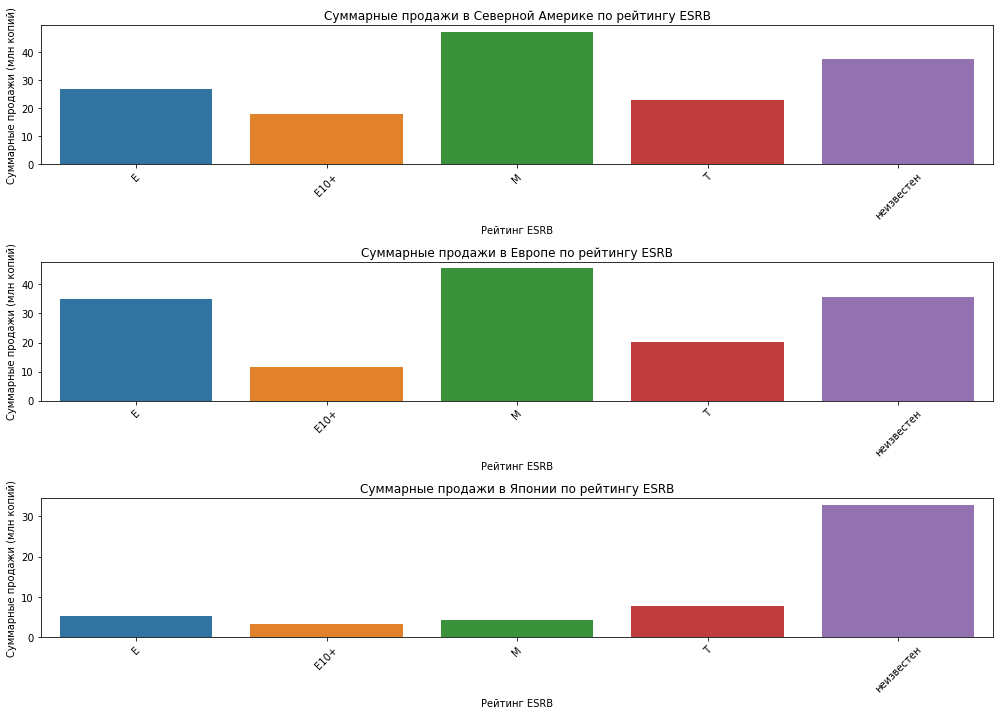

In [46]:
plt.figure(figsize=(14, 10))

# создаем графики для каждого региона
plt.subplot(3, 1, 1)
sns.barplot(data=sales_by_rating, x='rating', y='na_sales')
plt.title('Суммарные продажи в Северной Америке по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.barplot(data=sales_by_rating, x='rating', y='eu_sales' )
plt.title('Суммарные продажи в Европе по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.barplot(data=sales_by_rating, x='rating', y='jp_sales')
plt.title('Суммарные продажи в Японии по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи (млн копий)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

*Вывод:*

Можно сделать вывод о том, для регионов NA и EU самое большое количество продаж у игр с рейтингом ESRB "M", а у JP - с рейтингом "неизвестен"

**Шаг №5**

*Гипотеза № 1*

H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Где m1 - средний ползовательский рейтинг платформы Xbox One. m2 - средний ползовательский рейтинг платформы PC.

H0: m1 = m2

H1: m1 != m2

Двусторонняя критическая область 

alpha = 0.05

Выброки независимые, значит используем scipy.stats.ttest_ind

In [47]:
xone_scores = data_cleaned[data_cleaned['platform'] == 'XOne']['user_score'].dropna()

pc_scores = data_cleaned[data_cleaned['platform'] == 'PC']['user_score'].dropna()

t_statistic, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False, alternative='two-sided')

alpha = 0.05

print(f"T-статистика: {t_statistic}, P-значение: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

T-статистика: 1.0515500933673056, P-значение: 0.2946308864003345
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


*Гипотеза № 2*

H0: средние пользовательские рейтинги жанров Action и Sports не различаются.

H1: средние пользовательские рейтинги жанров Action и Sports разные.

Где m1 - средний пользовательский рейтинг жанра Action. m2 - это средний пользовательский рейтинг жанра Sports.

H0: m1 = m2

H1: m1 != m2

Двусторонняя критическая область 

alpha = 0.05

Выброки независимые, значит используем scipy.stats.ttest_ind

In [48]:
action_scores = data_cleaned[data_cleaned['genre'] == 'Action']['user_score'].dropna()

sports_scores = data_cleaned[data_cleaned['genre'] == 'Sports']['user_score'].dropna()


t_statistic, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False, alternative='two-sided')
print(f'T-test: Statistic={t_statistic}, p-value={p_value}')

alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.')
else:
    print('Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports не различаются.')

T-test: Statistic=6.764121363817531, p-value=5.97163549920592e-10
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.


*Вывод:*
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. средние пользовательские рейтинги жанров Action и Sports разные.

**Шаг №6**

**Общий вывод:**

В результате нашего анализа мы смогли выявить ключевые факторы успешности игр на рынке, определить перспективные платформы и жанры, а также провести обоснованную проверку гипотез. Эти выводы могут стать основой для стратегического планирования на 2017 год и помогут интернет-магазину «Стримчик».

1. Изучено поведение платформ на рынке: в среднем определенная платформа выпускает игры в течении ~10-11 лет. Пик продаж и количества выпущенных игр наступал через ~3 года после выпуска первой игры.

2. Изучено поведение платформ за 2015 и 2016 года: наблюдается спад продаж для всех платформ в 2016 году, по сравнению с 2015. Поценциально прибыльные платформы: PS4, 3DS, XOne.

3. Изучена зависимость: между отзывами критиков и продажами игр несильная положительная статистическая связь. Между отзывами пользователей и продажами игр нет статистической связи, коэф-т корреляции близок к 0. Мнение критиков сильнее влияет на продажи, чем мнение пользователей, но сильная статистическая связь отсуствует.

4. Изучены жанры игр: жанры с самым большим медианным количеством продаж: Shooter, Sports. Жанры с самым низким медианным количеством продаж: Misc, Adventure.

5. Были выявлены самые популярные платформы для каждого региона: для региона NA: PS4, XOne, 3DS, WiiU, X360. Для региона EU: PS4, XOne, PC, 3DS, PS3. Для региона JP: 3DS, PS4, PSV, PS3, WiiU.

6. Для регионов NA и EU самое большое количество продаж у игр с рейтингом ESRB "M", а у JP - с рейтингом "неизвестен"

7. Были выявлены самые популярные жанры игр для каждого региона: для региона NA: Shooter, Action, Sports, Role-playing, Misc. Для региона EU: Shooter, Action, Sports, Role-playing, Racing. Для региона JP: Acion, Role-playing, Shooter, Misc, Adventure.

8. Были сделаны выводы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние пользовательские рейтинги жанров Action и Sports разные.
